# Visualizing Data in Python

Diego Rodríguez Romero A01741413

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing data

In [2]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [12]:
# url string that hosts our .csv file
url = Ruta + "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "Class"]
df = pd.read_csv(url,header=None,names=column_names)

# Exploring the content of the data set

Get a general 'feel' of the data


In [35]:
df

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.shape

(150, 5)

In [8]:
df.columns

Index(['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'Class'], dtype='object')

In [9]:
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [10]:
# Number of times that each distinct value of a variable occurs in a data set
df.Class.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [11]:
# Proportion of each distinct value of a variable occurs in a data set
x = df.Class.value_counts()
pct = (x / x.sum()) * 100
pct

Iris-setosa        33.333333
Iris-versicolor    33.333333
Iris-virginica     33.333333
Name: Class, dtype: float64

Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [13]:
# Total number of observations
print("Numero de Observaciones: ",df.shape[0])


# Total number of null observations
print("Hay ",df.petal_length.isnull().sum()," observaciones nulas")


# Total number of counts (excluding missing values)
print("Hay ",df.petal_length.notnull().sum()," observaciones validas")


Numero de Observaciones:  150
Hay  0  observaciones nulas
Hay  150  observaciones validas


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

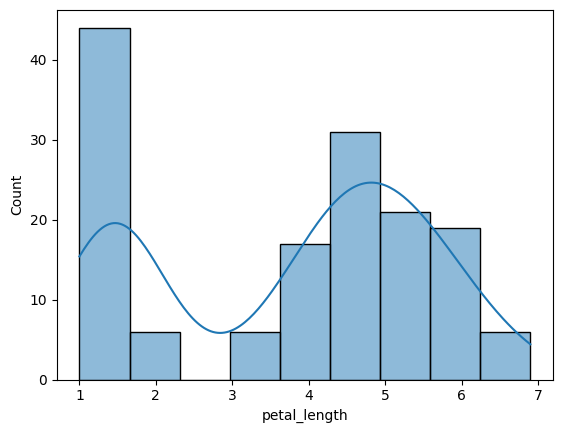

In [14]:
# Plot histogram of the CWdistance
sns.histplot(df.petal_length, kde=True)
plt.show()

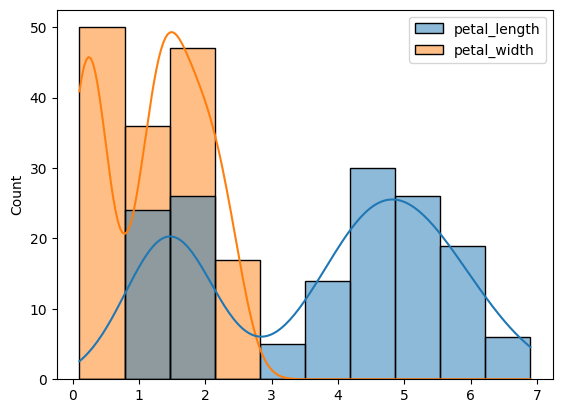

In [15]:
# Plot histogram of both the Age and the Wingspan
df2plot = df[["petal_length", "petal_width"]]

sns.histplot(df2plot, kde=True)
plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

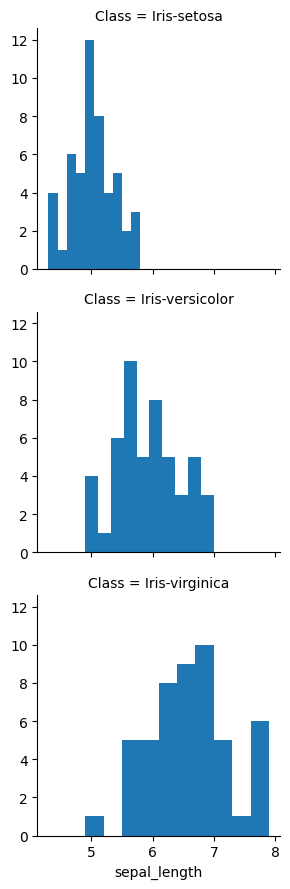

In [16]:
# Create histograms of the "aepal_length" grouped by "Class"

g = sns.FacetGrid(df, row="Class")

g = g.map(plt.hist, "sepal_length")

plt.show()


# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

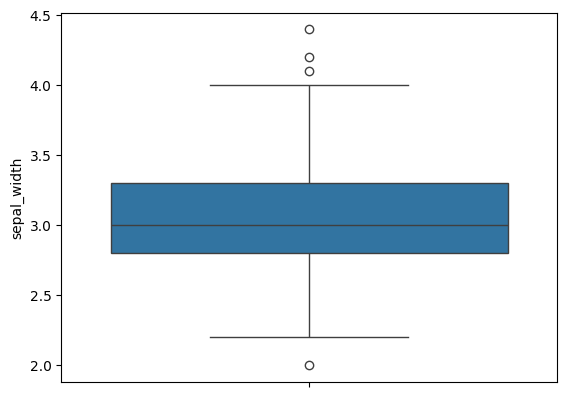

In [17]:
# Create the boxplot of the "sepal_width" amounts
sns.boxplot(df["sepal_width"])

plt.show()


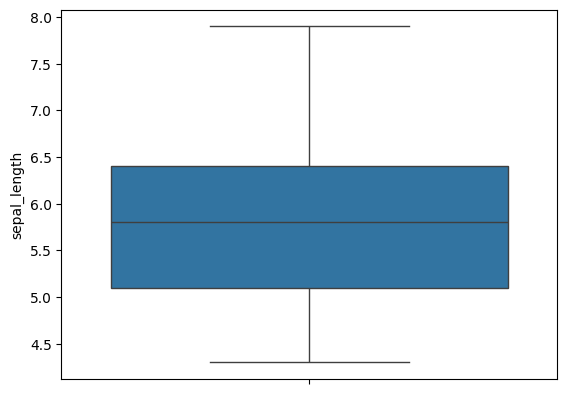

In [18]:
# Create the boxplot of the "sepal_length" amounts
sns.boxplot(df["sepal_length"])

plt.show()


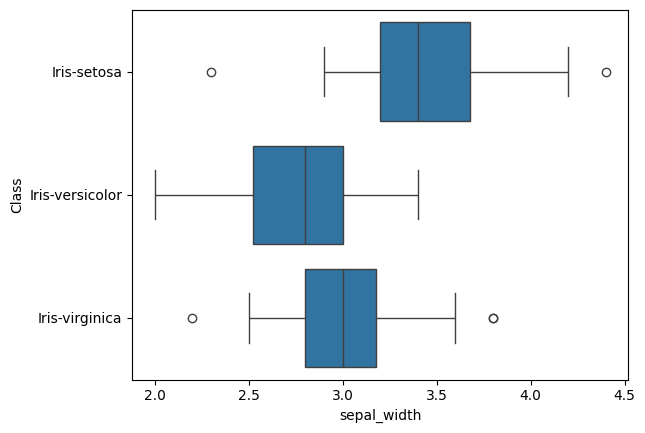

In [19]:
# Create the boxplots of the "sepal_width" and of the "Class" amounts
sns.boxplot(data=df, x="sepal_width", y="Class")

plt.show()


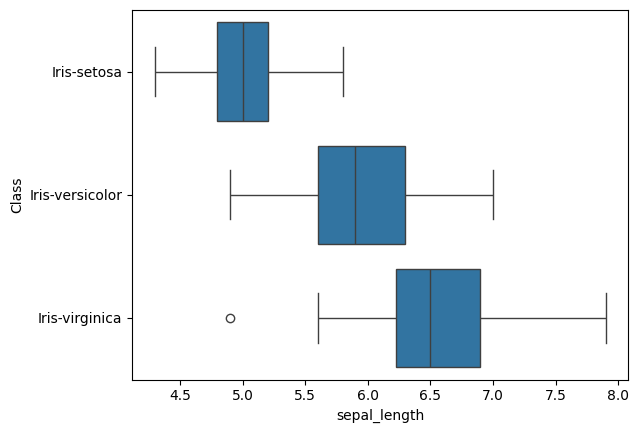

In [20]:
# Create the boxplots of the "Wingspan" and of the "tips" amounts
sns.boxplot(data=df, x="sepal_length", y="Class")

plt.show()

# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

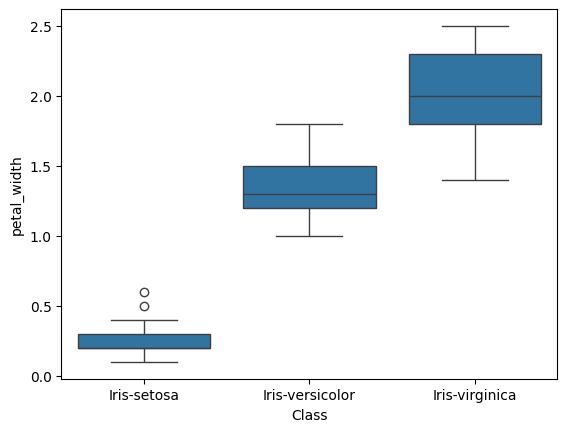

In [23]:
# Create side-by-side boxplots of the "Height" grouped by "Gender"
sns.boxplot(data=df, y="petal_width", x="Class")

plt.show()

# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


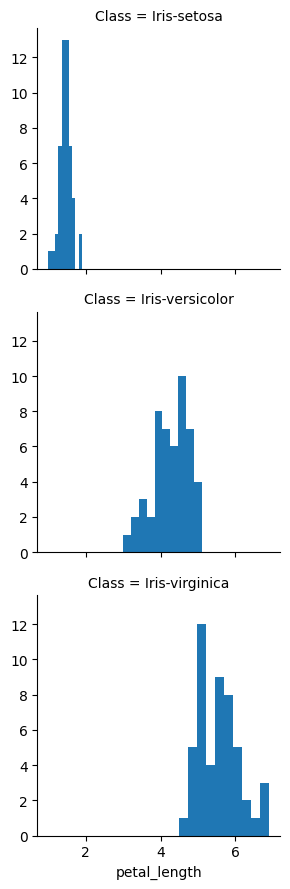

In [25]:
#Histogram
g = sns.FacetGrid(df, row="Class")

g = g.map(plt.hist, "petal_length")

plt.show()


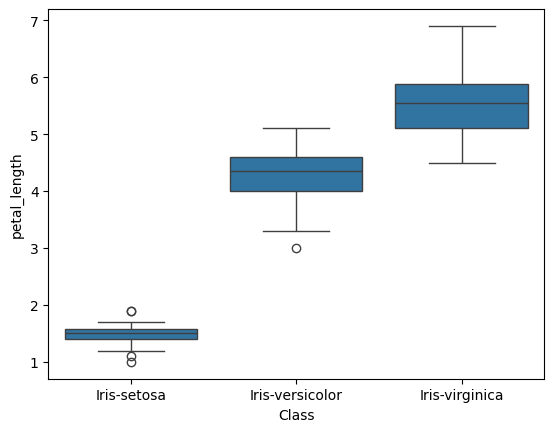

In [26]:
#Boxplot
# Create side-by-side boxplots of the "Height" grouped by "Gender"
sns.boxplot(data=df, y="petal_length", x="Class")

plt.show()

# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

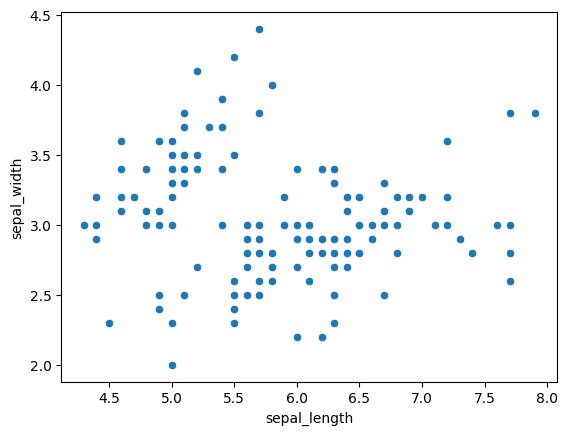

In [27]:
# scatter plot between two variables

sns.scatterplot(data=df, y = "sepal_width", x="sepal_length")
plt.show()

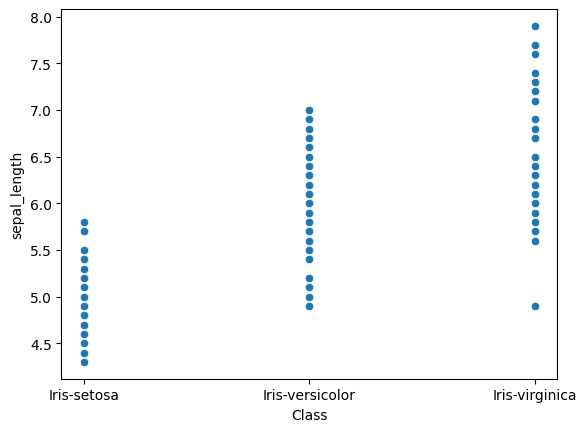

In [28]:
# scatter plot between two variables (one categorical)
sns.scatterplot(data=df, y = "sepal_length", x="Class")
plt.show()

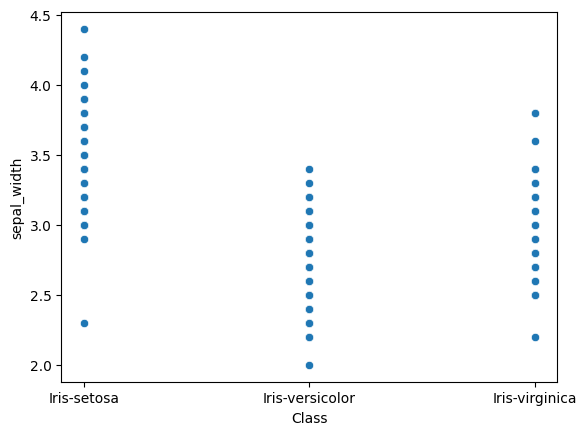

In [29]:
# scatter plot between two variables (one categorical)

sns.scatterplot(data=df, y = "sepal_width", x="Class")
plt.show()


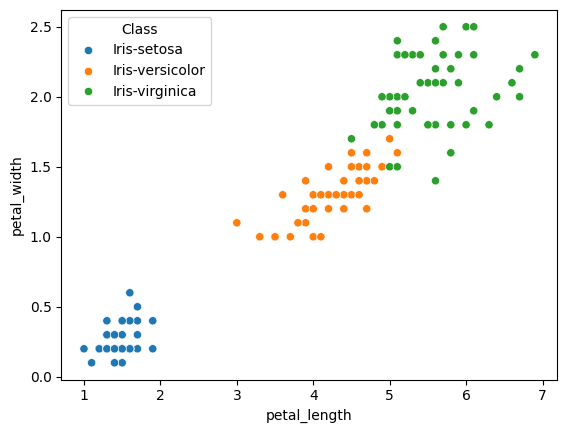

In [30]:
# scatter plot between two variables grouped according to a categorical variable

sns.scatterplot(data=df, x= "petal_length", y="petal_width", hue="Class")
plt.show()

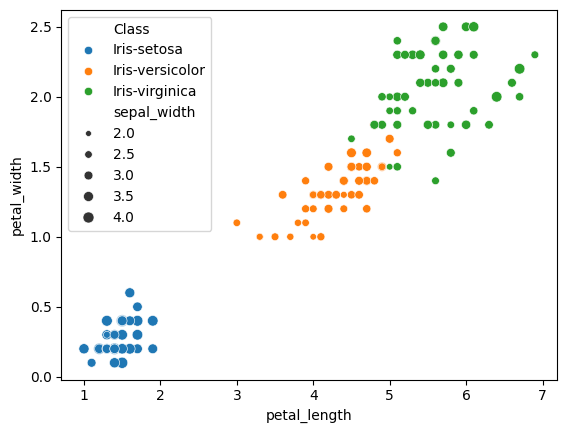

In [34]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers
sns.scatterplot(data=df, y= "petal_width", x="petal_length", hue="Class", size="sepal_width")
plt.show()

# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


##1.- Plot the histograms for each of the four quantitative variables

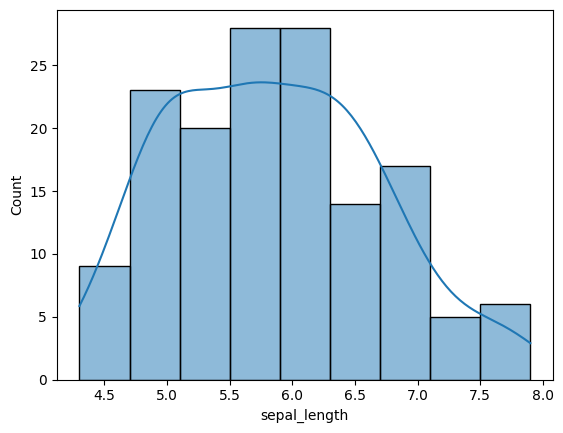

In [36]:
#Histogram of sepal_length
sns.histplot(df.sepal_length, kde=True)
plt.show()

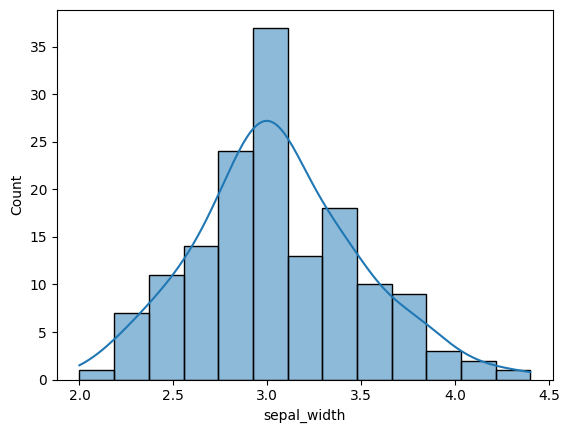

In [37]:
#Histogram of sepal_width
sns.histplot(df.sepal_width, kde=True)
plt.show()

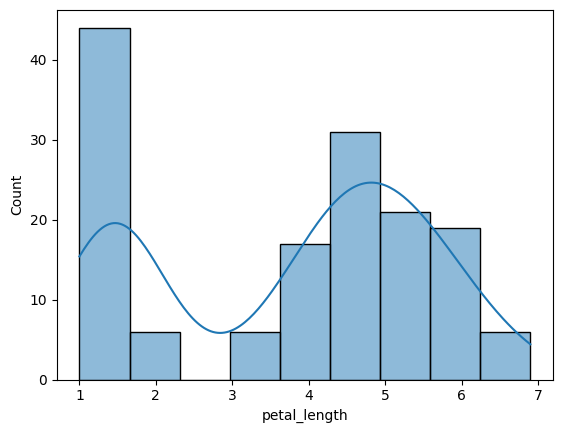

In [38]:
#Histogram of petal_length
sns.histplot(df.petal_length, kde=True)
plt.show()

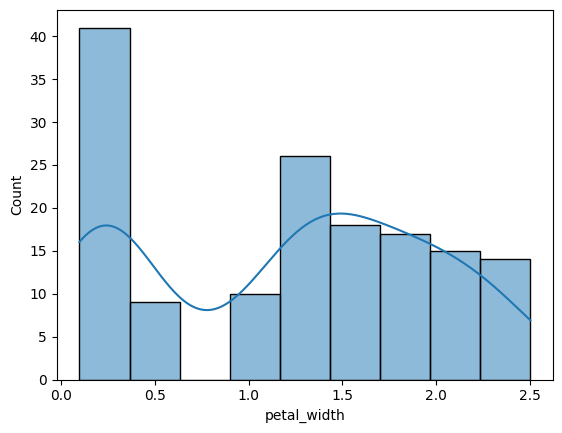

In [39]:
#Histogram of petal_width
sns.histplot(df.petal_width, kde=True)
plt.show()

##2.- Plot the histograms for each of the quantitative variables

I already plotted the histograms of the 4 quatitive variables. We can see that the distribution of sepal length and width is more "uniform" that meaning that it lokks like a normal distribution, specially the sepal width. On the other hand, the petal length and width tends to the minimmun and maximums, both of them have a high count of samples near he minimum value and then the count drops significally, to then rise a little bit again and fall but in a more "controlled".

##3.- Plot the boxplots for each of the quantitative variables

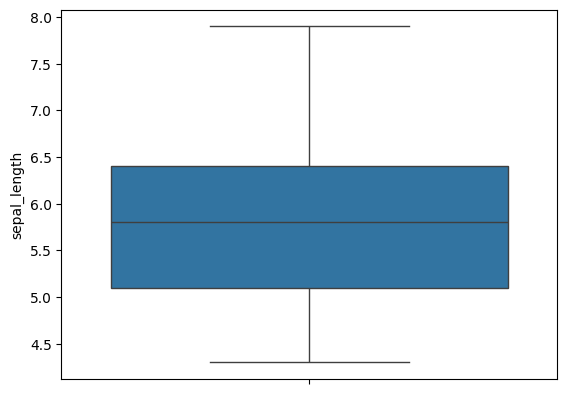

In [40]:
# Create the boxplot of the "sepal_length" amounts
sns.boxplot(df["sepal_length"])

plt.show()


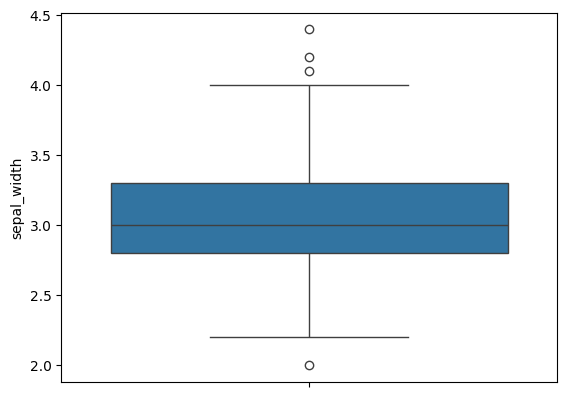

In [41]:
# Create the boxplot of the "sepal_width" amounts
sns.boxplot(df["sepal_width"])

plt.show()

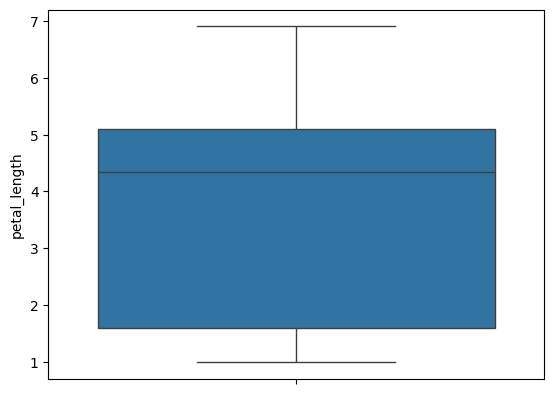

In [42]:
# Create the boxplot of the "petal_length" amounts
sns.boxplot(df["petal_length"])

plt.show()


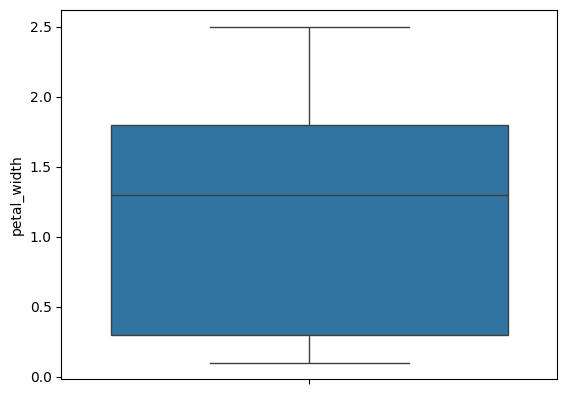

In [43]:
# Create the boxplot of the "petal_width" amounts
sns.boxplot(df["petal_width"])

plt.show()

As I said in the histograms, the majority of the sepal length and width samples tend to the median value and concentrate there, with a few outliers. On the other hand, with the petal, we can see that the 25% percentile is very close to the minimum values, in that sense the Interquartile area of the petal is bigger than the sepal.

##4.- Plot the boxplots of the petal width grouped by type of flower

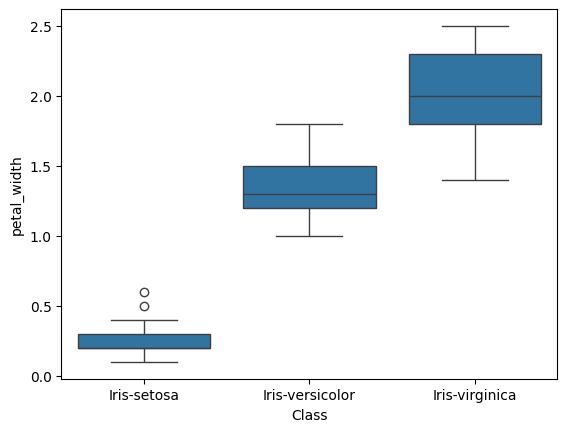

In [44]:
# Create side-by-side boxplots of the "petal_width" grouped by "Class"
sns.boxplot(data=df, y="petal_width", x="Class")

plt.show()

In this boxplot, we can realize that the petal width of the Iris Setosa is the samller of the 3, however it has 2 outliers. The Iris versicolor minimum petal width is longer than the maximum Iris Setosa petal width by moe than half a centimeter, and its maximum value is almost the same as the 25% percentile of the Iris Virgnica. While the minimum value of the Virginica is between median and Q3 of the versicolor

##5.-Plot the boxplots of the sepal length grouped by type of flower

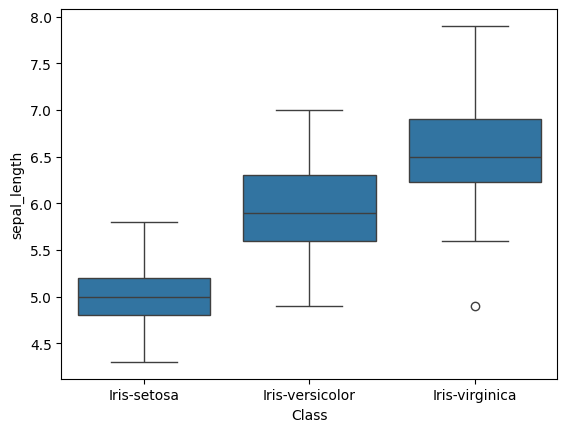

In [45]:
# Create side-by-side boxplots of the "sepal_length" grouped by "Class"
sns.boxplot(data=df, y="sepal_length", x="Class")

plt.show()

With the sepal length we can see a more stable increase in the length between the 3 types of flowers. The Iris setosa continues to be the most smaller of them all, but in this concrete measurement its values are nearer to the versicolor. The versicolor minimum is between the Interquartile range of the setosa and its maximum is higher thatn the Q3 of the Virginica, its a bigger range than the Setosa, more similar to the one of the Virginica. In this plot, we discover that the Virginica has an outlier below the minimum, and that its range is the biggest of them all, around 2.5 cm.

##6.- Provide a description (explaination from your observations) of each of the quantitative variables

**Sepal Length:** The majority of the values for the sample tend to the Median, and its Histogram looks like a normal distribution. It does not have outlies.

**Sepal width:** It has a high count of samples near or aat the median, which is 3, of the 4 variables it has the histogram thatlooks the most like a normal distribution. It has Outliers bth above the maximum and below the minimum

**Petal Length:** The petal length has a count of around 40 samples near the minimmum, 1. Then it doesn have samples between 2 and 3. But from 3 to 7 the distribution looks normal. It oesn have outliers.

**Petal Width:** Similar to the length, it has a count of 40 values near the minimum, whic is 0.1. And then, no values between 0.5 and 1. Its interquartile range is abou 1.5, making it the 2nd biggest, just behinf the Petal lenght.